# IMDB Movies Rating Analysis

## Imports Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import requests
from bs4 import BeautifulSoup
import re

# Website

In [2]:
website="https://www.imdb.com/list/ls006266261/?sort=list_order,asc&st_dt=&mode=detail&page=1"

# Get Requests

In [3]:
response=requests.get(website)


# Status code

In [4]:
response.status_code

200

# Soup Object

In [5]:
soup=BeautifulSoup(response.content,"html.parser")
soup


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>The 1000 Greatest Films of All Time - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/list/ls006266261/" rel="canonical"/>
<meta content="http://www.imdb.com/list/ls006266261/" property="og:url">
<script>
    if (typeof uet =

In [6]:
movie_data=soup.findAll("div",{"class":"lister-item mode-detail"})

In [7]:
movie_data

[<div class="lister-item mode-detail">
 <div class="lister-item-image ribbonize" data-tconst="tt0068646">
 <a href="/title/tt0068646/"> <img alt="The Godfather" class="loadlate" data-tconst="tt0068646" height="209" loadlate="https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY209_CR3,0,140,209_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="140"/>
 </a> </div>
 <div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt0068646/">The Godfather</a>
 <span class="lister-item-year text-muted unbold">(1972)</span>
 </h3>
 <p class="text-muted text-small">
 <span class="certificate">A</span>
 <span class="ghost">|</span>
 <span class="runtime">175 min</span>
 <span class="ghost">|</span>
 <span class="genre">
 Crime, Drama            </span>
 </p>
 <div class="ipl-rating-widget">
 <div class="ipl-ra

# DataFrame

In [8]:
movie_name=[]
time=[]
rating=[]
metascore=[]
year=[]
gross=[]
genre=[]
certificate=[]

for i in range(1,6):
    
    website="https://www.imdb.com/list/ls006266261/?sort=list_order,asc&st_dt=&mode=detail&page="+str(i)    
    response=requests.get(website).text
    soup=BeautifulSoup(response,"html.parser")
    movie_data=soup.findAll("div",{"class":"lister-item mode-detail"})
    
    for store in movie_data:
        
        name=store.h3.a.text 
        movie_name.append(name)
    
    
        runtime=store.p.find("span", class_="runtime").text.replace("min","") 
        time.append(runtime)
    

        rate=store.find("span",class_="ipl-rating-star__rating").text
        rating.append(rate)
        
        meta=store.find("span",class_="metascore")
        metascore.append(meta)
        
        genres=store.p.find("span",class_="genre").text.replace("\n","").replace(" ","") 
        genre.append(genres)
        
        certificates=store.p.find("span",class_="certificate") 
        certificate.append(certificates)
        
        year_of_release=store.h3.find("span", class_="lister-item-year text-muted unbold").text.replace("(","").replace(")","") 
        year.append(year_of_release)
        
       
    
        
        value=store.findAll("span",attrs={"name":"nv"})
        gros=value[0].text.replace("$","").replace("M","").replace(",","")
        gross.append(gros)
        
        
        
        
        
    

In [9]:
movie_DF=pd.DataFrame({"Name_of_the_movie":movie_name,"Watch_time":time,"Rating":rating,"Metascore":metascore,"Year":year,"Gross_collection":gross,"genre":genre,"certificate":certificate})
movie_DF.to_csv("moviesdata.csv")

# Dataset of the data

In [10]:
movie_DF

Name_of_the_movie Watch_time Rating      Metascore  Year  \
0                  The Godfather       175     9.2  [100        ]  1972   
1                     Goodfellas       145     8.7   [90        ]  1990   
2                   Pulp Fiction       154     8.9   [94        ]  1994   
3             The Usual Suspects       106     8.5   [77        ]  1995   
4                 Apocalypse Now       147     8.5   [94        ]  1979   
..                           ...        ...    ...            ...   ...   
495                Happy Gilmore        92       7   [31        ]  1996   
496            Kramer vs. Kramer       105     7.8   [77        ]  1979   
497                  Wonder Boys       107     7.2   [73        ]  2000   
498            War of the Worlds       116     6.5   [73        ]  2005   
499  Four Weddings and a Funeral       117     7.1   [81        ]  1994   

    Gross_collection                    genre certificate  
0            1830803              Crime,Drama         [A]  
1            1144217    Biography,Crime,Drama         [A]  
2            2021202              Crime,Drama         [A]  
3            1074850   Crime,Mystery,Thriller         [A]  
4             661413        Drama,Mystery,War         [R]  
..               ...                      ...         ...  
495           224653             Comedy,Sport     [PG-13]  
496           145118                    Drama         [U]  
497            64518             Comedy,Drama         [R]  
498           447359  Action,Adventure,Sci-Fi        [UA]  
499           152772     Comedy,Drama,Romance         [A]  

[500 rows x 8 columns]

# Task 2: Cleaning the Data

In [11]:
movie_DF.isnull().sum()


Name_of_the_movie     0
Watch_time            0
Rating                0
Metascore            12
Year                  0
Gross_collection      0
genre                 0
certificate          20
dtype: int64

In [12]:
movie_DF.describe()

Name_of_the_movie Watch_time Rating     Metascore  Year  \
count                500        500    500           488   500   
unique               500        104     30            58    77   
top        The Godfather       107     7.7  [79        ]  1999   
freq                   1         15     39            23    22   

       Gross_collection        genre certificate  
count               500          500         480  
unique              500          155          15  
top             1830803  Crime,Drama         [A]  
freq                  1           21         180

In [13]:
movie_DF.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [14]:
movie_DF.isnull()

Name_of_the_movie  Watch_time  Rating  Metascore   Year  \
0                False       False   False      False  False   
1                False       False   False      False  False   
2                False       False   False      False  False   
3                False       False   False      False  False   
4                False       False   False      False  False   
..                 ...         ...     ...        ...    ...   
495              False       False   False      False  False   
496              False       False   False      False  False   
497              False       False   False      False  False   
498              False       False   False      False  False   
499              False       False   False      False  False   

     Gross_collection  genre  certificate  
0               False  False        False  
1               False  False        False  
2               False  False        False  
3               False  False        False  
4               False  False        False  
..                ...    ...          ...  
495             False  False        False  
496             False  False        False  
497             False  False        False  
498             False  False        False  
499             False  False        False  

[500 rows x 8 columns]

In [15]:
movie_DF.dropna(axis=0,how="any").shape

(474, 8)

In [16]:
movie_DF.dropna(axis=0,how="any",inplace=True)

In [17]:
movie_DF.isnull().sum(axis=0)


Name_of_the_movie    0
Watch_time           0
Rating               0
Metascore            0
Year                 0
Gross_collection     0
genre                0
certificate          0
dtype: int64

# Changing data types

In [18]:
movie_DF.dtypes

Name_of_the_movie    object
Watch_time           object
Rating               object
Metascore            object
Year                 object
Gross_collection     object
genre                object
certificate          object
dtype: object

In [19]:
movie_DF["Watch_time"]=movie_DF.Watch_time.astype(int)

In [20]:
movie_DF["Rating"]=movie_DF.Rating.astype(float)

In [21]:
movie_DF["Year"]=movie_DF["Year"].apply(lambda x:x.replace("I","")).astype(int)

In [22]:
movie_DF["Gross_collection"]=movie_DF.Gross_collection.astype(float)

In [23]:
a = []
for i in movie_DF.Metascore:
    if i != None:
        a.append(i.text)
    else:
        a.append(np.nan)

In [24]:
movie_DF.Metascore=a

In [25]:
a = []
for i in movie_DF.certificate:
    if i != None:
        a.append(i.text)
    else:
        a.append(np.nan)

In [26]:
movie_DF.certificate=a

In [27]:
movie_DF["Metascore"]=movie_DF.Metascore.astype(float)

In [28]:
movie_DF.dtypes

Name_of_the_movie     object
Watch_time             int32
Rating               float64
Metascore            float64
Year                   int32
Gross_collection     float64
genre                 object
certificate           object
dtype: object

# Least 10 Movies

In [29]:
t=movie_DF.sort_values(by="Rating",ascending=False).tail(10)
t

Name_of_the_movie  Watch_time  Rating  \
265                                 Drag Me to Hell          99     6.6   
306                                 This Is the End         107     6.6   
488  The Bad Lieutenant: Port of Call - New Orleans         122     6.6   
242                              Jackass: The Movie          85     6.6   
150                         The Rules of Attraction         110     6.6   
451                            Revenge of the Nerds          90     6.6   
498                               War of the Worlds         116     6.5   
322                         The Blair Witch Project          81     6.5   
418                                  American Pie 2         108     6.4   
420                                      Wolf Creek          99     6.2   

     Metascore  Year  Gross_collection                      genre certificate  
265       83.0  2009          203103.0                     Horror       PG-13  
306       67.0  2013          410151.0             Comedy,Fantasy           A  
488       69.0  2009           77625.0                Crime,Drama           R  
242       42.0  2002           95267.0  Documentary,Action,Comedy           A  
150       50.0  2002           51689.0       Comedy,Drama,Romance   Not Rated  
451       44.0  1984           54177.0                     Comedy          UA  
498       73.0  2005          447359.0    Action,Adventure,Sci-Fi          UA  
322       81.0  1999          258615.0             Horror,Mystery          UA  
418       43.0  2001          255586.0                     Comedy          18  
420       54.0  2005           73063.0            Horror,Thriller           A

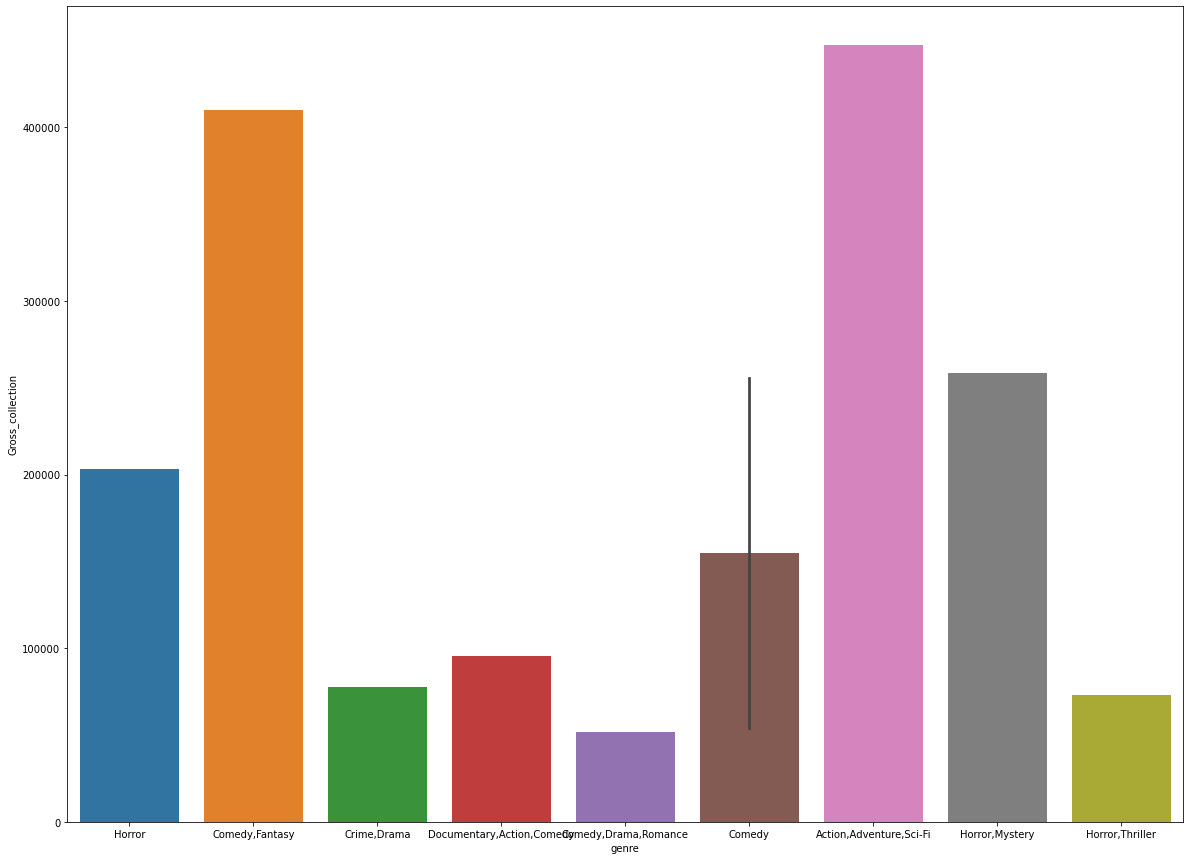

In [30]:
plt.figure(figsize=(20,15))
sns.barplot(x="genre",y='Gross_collection',data=t)
plt.show()

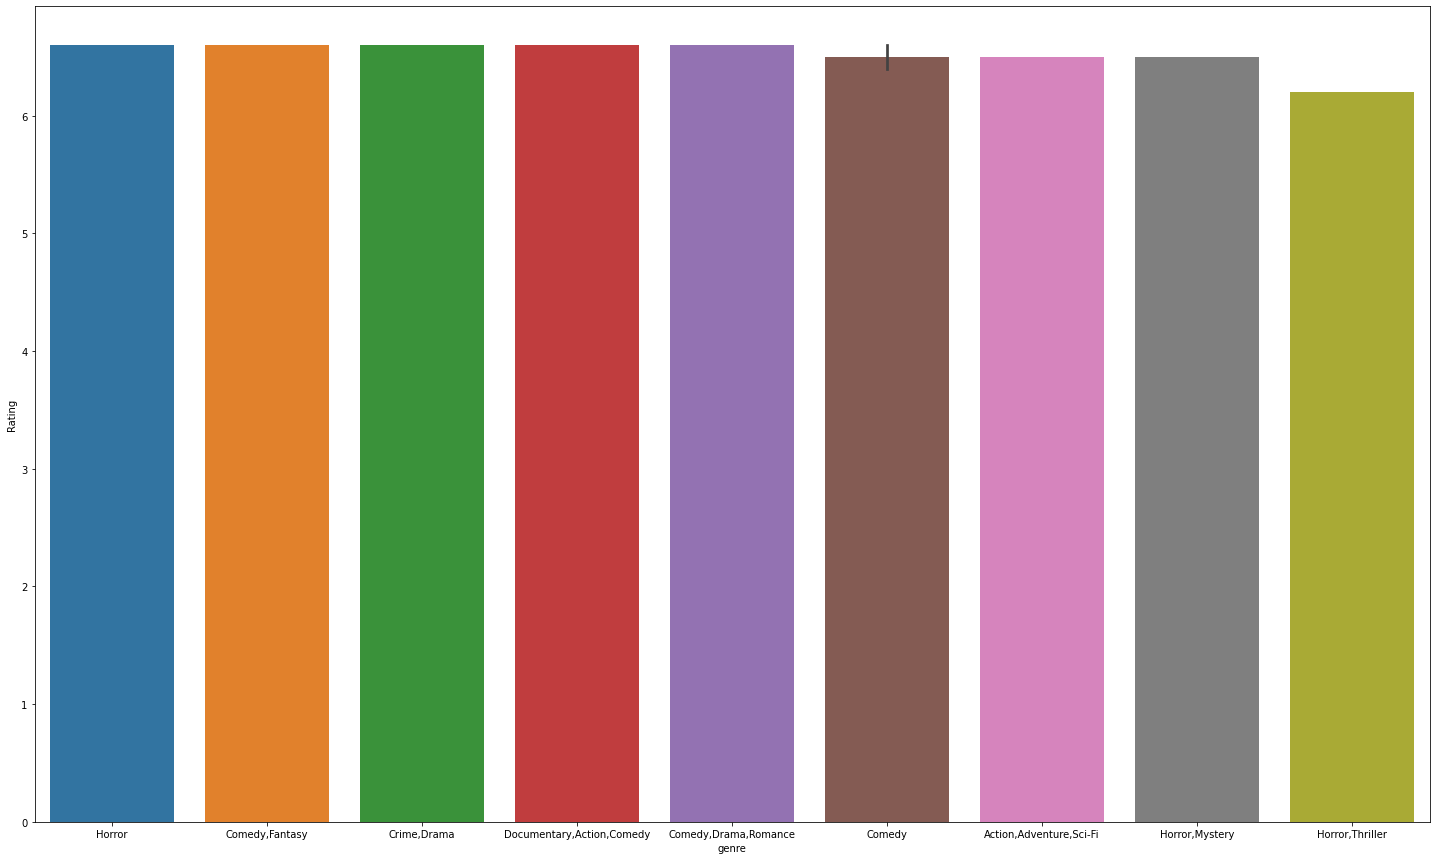

In [31]:
plt.figure(figsize=(25,15))
sns.barplot(x="genre",y='Rating',data=t)
plt.show()

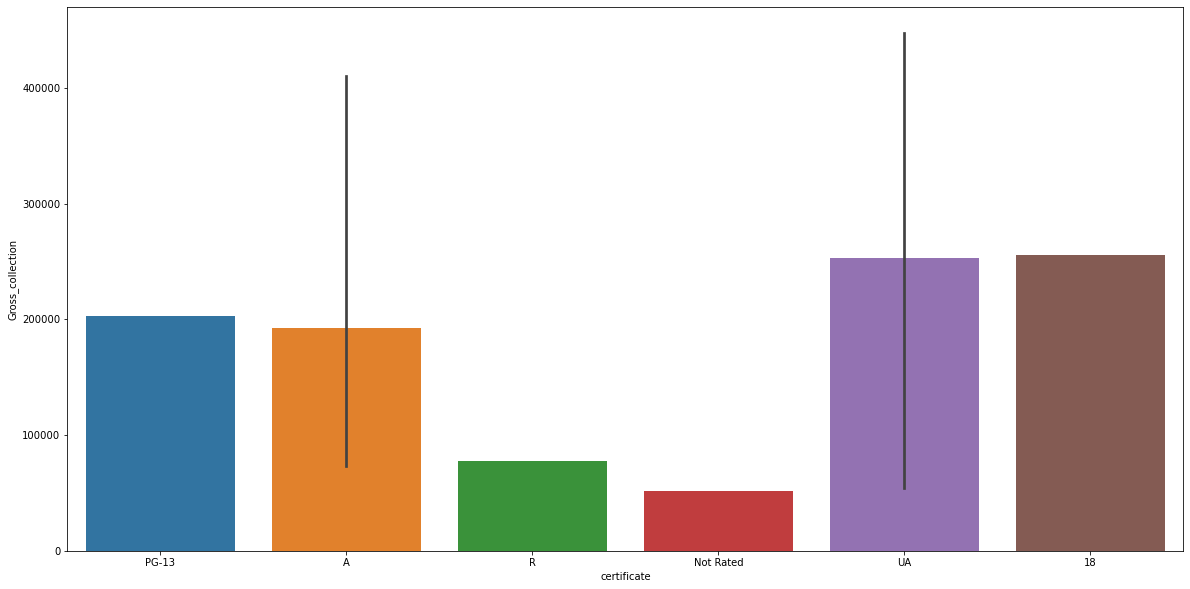

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(y="Gross_collection",x='certificate',data=t)
plt.show()

In [33]:
movie_DF["Gross_collection"].corr(movie_DF["Year"])

0.13287940486520872

In [34]:
movie_DF.dtypes

Name_of_the_movie     object
Watch_time             int32
Rating               float64
Metascore            float64
Year                   int32
Gross_collection     float64
genre                 object
certificate           object
dtype: object

In [35]:
movie_DF

Name_of_the_movie  Watch_time  Rating  Metascore  Year  \
0                  The Godfather         175     9.2      100.0  1972   
1                     Goodfellas         145     8.7       90.0  1990   
2                   Pulp Fiction         154     8.9       94.0  1994   
3             The Usual Suspects         106     8.5       77.0  1995   
4                 Apocalypse Now         147     8.5       94.0  1979   
..                           ...         ...     ...        ...   ...   
495                Happy Gilmore          92     7.0       31.0  1996   
496            Kramer vs. Kramer         105     7.8       77.0  1979   
497                  Wonder Boys         107     7.2       73.0  2000   
498            War of the Worlds         116     6.5       73.0  2005   
499  Four Weddings and a Funeral         117     7.1       81.0  1994   

     Gross_collection                    genre certificate  
0           1830803.0              Crime,Drama           A  
1           1144217.0    Biography,Crime,Drama           A  
2           2021202.0              Crime,Drama           A  
3           1074850.0   Crime,Mystery,Thriller           A  
4            661413.0        Drama,Mystery,War           R  
..                ...                      ...         ...  
495          224653.0             Comedy,Sport       PG-13  
496          145118.0                    Drama           U  
497           64518.0             Comedy,Drama           R  
498          447359.0  Action,Adventure,Sci-Fi          UA  
499          152772.0     Comedy,Drama,Romance           A  

[474 rows x 8 columns]

<AxesSubplot:xlabel='Rating'>

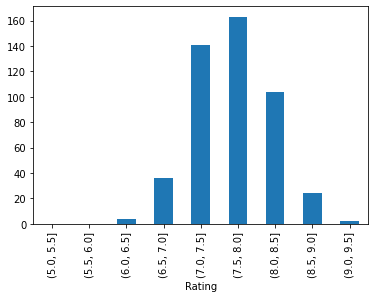

In [56]:
bins = [5,5.5,6,6.5,7,7.5,8,8.5,9,9.5]
movies= movie_DF.groupby(pd.cut(movie_DF['Rating'], bins=bins)).Rating.count()
movies.plot(kind='bar')


# Certificates list

In [37]:
movie_DF.certificate.value_counts()

A            177
UA           103
U             98
R             61
18             9
PG-13          8
PG             5
Not Rated      3
16             3
15+            2
13             2
(Banned)       1
7              1
U/A            1
Name: certificate, dtype: int64

<AxesSubplot:title={'center':'Content making of movies'}, xlabel='certificates', ylabel='Number of movies'>

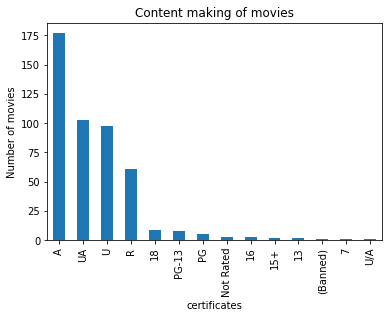

In [38]:
movie_DF.certificate.value_counts().plot(kind="bar",xlabel="certificates",ylabel="Number of movies",title="Content making of movies")

In [39]:
t.certificate.value_counts()

A            3
UA           3
PG-13        1
R            1
Not Rated    1
18           1
Name: certificate, dtype: int64

# Univarient (Pie Plot)

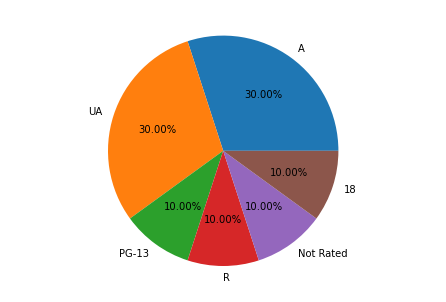

In [40]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
certificate = ['A','UA','PG-13','R','Not Rated','18']
values = [3,3,1,1,1,1]
ax.pie(values, labels = certificate,autopct='%1.2f%%')
plt.show()

In [80]:
t.sort_values(by="Gross_collection",ascending=False)

Name_of_the_movie  Watch_time  Rating  \
498                               War of the Worlds         116     6.5   
306                                 This Is the End         107     6.6   
322                         The Blair Witch Project          81     6.5   
418                                  American Pie 2         108     6.4   
265                                 Drag Me to Hell          99     6.6   
242                              Jackass: The Movie          85     6.6   
488  The Bad Lieutenant: Port of Call - New Orleans         122     6.6   
420                                      Wolf Creek          99     6.2   
451                            Revenge of the Nerds          90     6.6   
150                         The Rules of Attraction         110     6.6   

     Metascore  Year  Gross_collection                      genre certificate  
498       73.0  2005          447359.0    Action,Adventure,Sci-Fi          UA  
306       67.0  2013          410151.0             Comedy,Fantasy           A  
322       81.0  1999          258615.0             Horror,Mystery          UA  
418       43.0  2001          255586.0                     Comedy          18  
265       83.0  2009          203103.0                     Horror       PG-13  
242       42.0  2002           95267.0  Documentary,Action,Comedy           A  
488       69.0  2009           77625.0                Crime,Drama           R  
420       54.0  2005           73063.0            Horror,Thriller           A  
451       44.0  1984           54177.0                     Comedy          UA  
150       50.0  2002           51689.0       Comedy,Drama,Romance   Not Rated

In [77]:
np.mean(t)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Watch_time             101.70
Rating                   6.52
Metascore               60.60
Year                  2002.90
Gross_collection    192663.50
dtype: float64

<Figure size 2160x720 with 0 Axes>

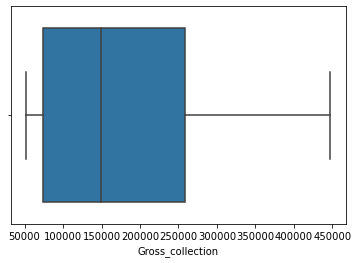

<Figure size 2160x720 with 0 Axes>

In [78]:
sns.boxplot(x="Gross_collection",data=t)
plt.figure(figsize=(30,10))

<AxesSubplot:xlabel='certificate', ylabel='Rating'>

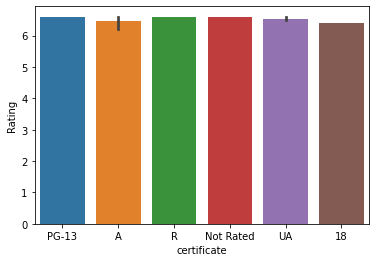

In [71]:
sns.barplot(x='certificate',y='Rating',data=t) 

# Point plot(Bi-Variant) 

<AxesSubplot:xlabel='Metascore', ylabel='Rating'>

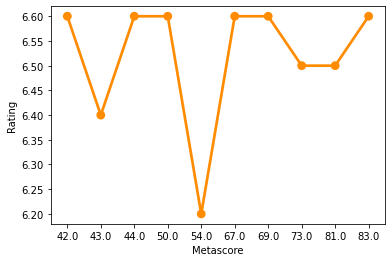

In [72]:
sns.pointplot(x='Metascore',y='Rating',data=t,color='darkorange')

# Regplot(Gross_collection Vs Rating)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gross_collection', ylabel='Rating'>

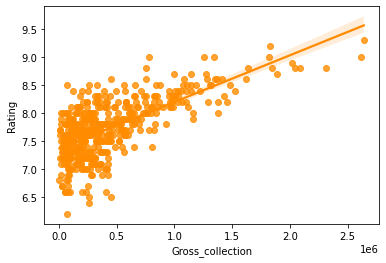

In [79]:
sns.regplot(movie_DF['Gross_collection'],movie_DF['Rating'],color='darkorange')

# Scatterplot(Watch_time Vs Rating)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Watch_time', ylabel='Rating'>

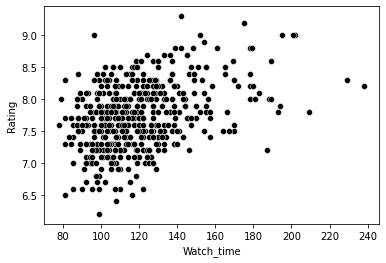

In [47]:
sns.scatterplot(movie_DF["Watch_time"],movie_DF['Rating'],color='Black')

In [48]:
t.describe()

Watch_time     Rating  Metascore         Year  Gross_collection
count   10.000000  10.000000  10.000000    10.000000         10.000000
mean   101.700000   6.520000  60.600000  2002.900000     192663.500000
std     13.383655   0.131656  15.882905     7.908505     147823.081013
min     81.000000   6.200000  42.000000  1984.000000      51689.000000
25%     92.250000   6.500000  45.500000  2001.250000      74203.500000
50%    103.000000   6.600000  60.500000  2003.500000     149185.000000
75%    109.500000   6.600000  72.000000  2008.000000     257857.750000
max    122.000000   6.600000  83.000000  2013.000000     447359.000000

# Multivariant(Top least 10 movies)

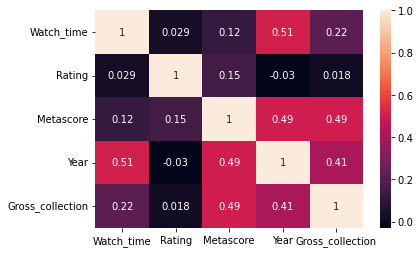

In [49]:
sns.heatmap(t.corr(),annot=True)
plt.show()